In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakshitha8843","key":"71217f6f913ceb892110027b68705e3b"}'}

In [2]:
! pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d emmarex/plantdisease

100% 657M/658M [00:33<00:00, 21.3MB/s]
100% 658M/658M [00:33<00:00, 20.4MB/s]


In [6]:
!ls -lrth

total 658M
drwxr-xr-x 1 root root 4.0K Jun 21 21:47 sample_data
-rw-r--r-- 1 root root   69 Jun 23 02:25 kaggle.json
-rw-r--r-- 1 root root 658M Jun 23 02:26 plantdisease.zip


In [7]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [8]:
!ls -lrth PlantVillage/

total 2.0M
drwxr-xr-x 2 root root 100K Jun 23 02:27 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 140K Jun 23 02:27 Pepper__bell___healthy
drwxr-xr-x 2 root root  96K Jun 23 02:27 Potato___Early_blight
drwxr-xr-x 2 root root  96K Jun 23 02:27 Potato___Late_blight
drwxr-xr-x 2 root root  20K Jun 23 02:27 Potato___healthy
drwxr-xr-x 2 root root 220K Jun 23 02:27 Tomato_Bacterial_spot
drwxr-xr-x 2 root root 104K Jun 23 02:27 Tomato_Early_blight
drwxr-xr-x 2 root root 192K Jun 23 02:27 Tomato_Late_blight
drwxr-xr-x 2 root root  96K Jun 23 02:27 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 168K Jun 23 02:27 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 168K Jun 23 02:27 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 132K Jun 23 02:27 Tomato__Target_Spot
drwxr-xr-x 2 root root 300K Jun 23 02:27 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  36K Jun 23 02:27 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 148K Jun 23 02:27 Tomato_healthy


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [10]:
imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [11]:
class_names = os.listdir(imgs_path)
class_names

['Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Potato___healthy',
 'Tomato_Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Potato___Early_blight',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Late_blight',
 'Potato___Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Pepper__bell___healthy']

In [12]:
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [13]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


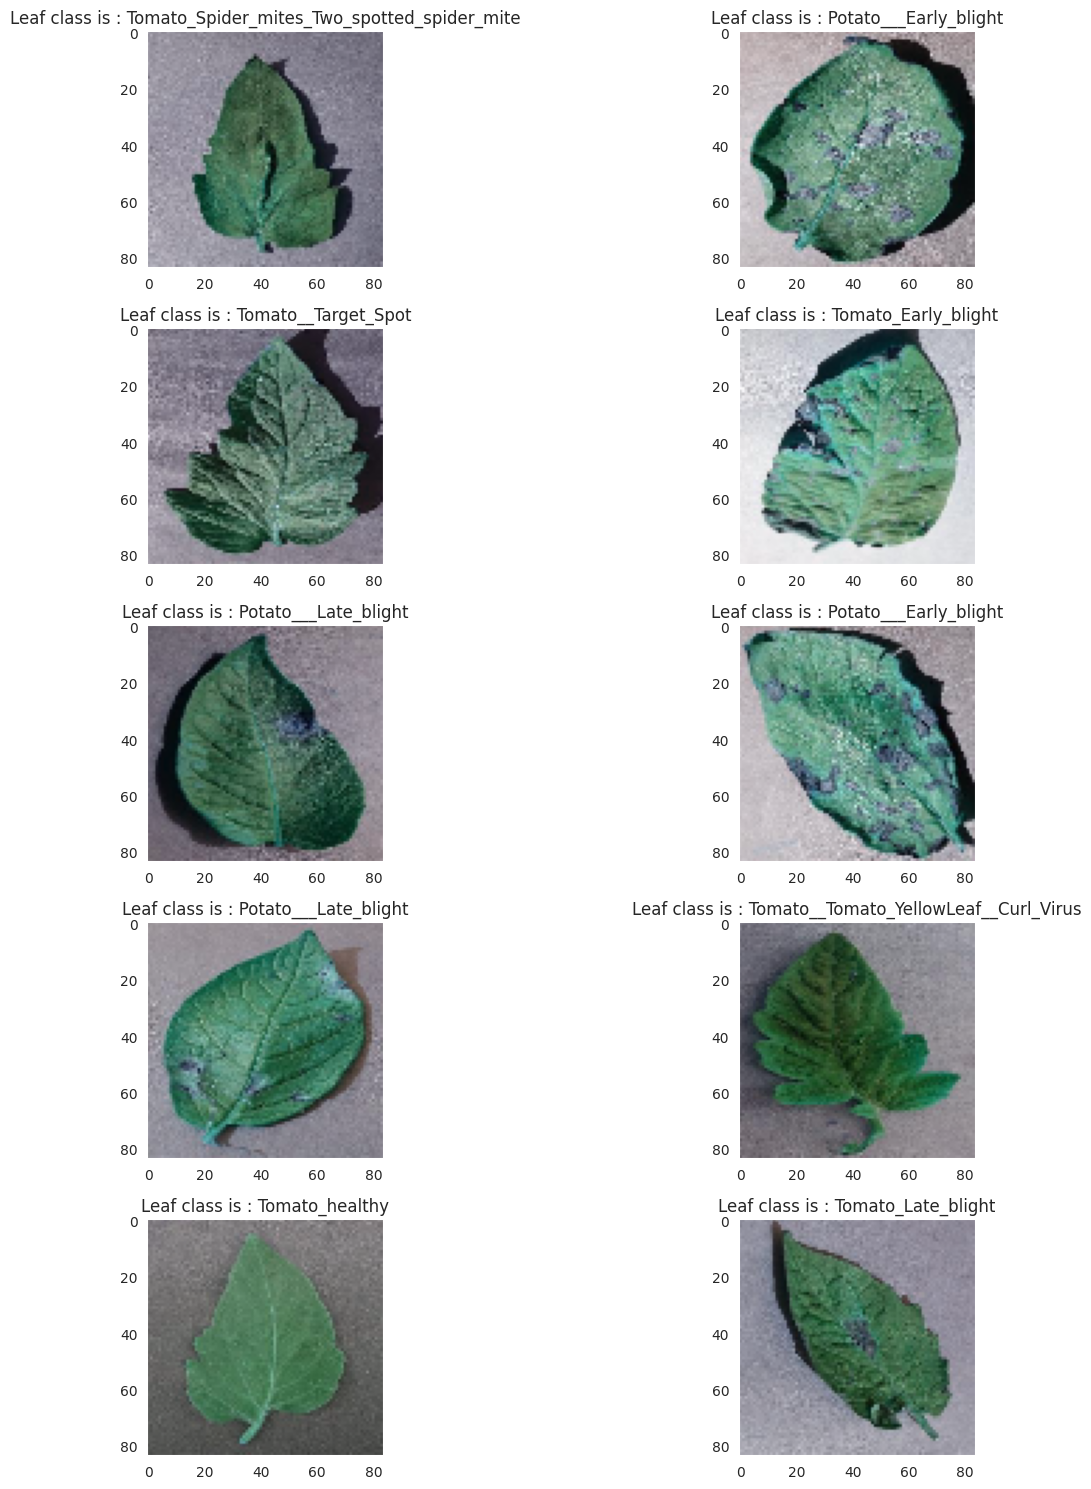

In [15]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [16]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[-0.1607843 , -0.23921567, -0.11372548],
        [-0.14509803, -0.2235294 , -0.09803921],
        [-0.21568626, -0.29411763, -0.16862744],
        ...,
        [-0.62352943, -0.64705884, -0.47450978],
        [-0.6313726 , -0.654902  , -0.4823529 ],
        [-0.6156863 , -0.6392157 , -0.46666664]],

       [[-0.1372549 , -0.21568626, -0.09019607],
        [-0.15294117, -0.23137254, -0.10588235],
        [-0.1372549 , -0.20784312, -0.08235294],
        ...,
        [-0.5529412 , -0.6       , -0.41960782],
        [-0.54509807, -0.5921569 , -0.41176468],
        [-0.5137255 , -0.56078434, -0.38039213]],

       [[-0.2235294 , -0.30196077, -0.17647058],
        [-0.14509803, -0.2235294 , -0.09803921],
        [-0.17647058, -0.26274508, -0.12941176],
        ...,
        [-0.5294118 , -0.5921569 , -0.41176468],
        [-0.54509807, -0.60784316, -0.42745095],
        [-0.54509807, -0.60784316, -0.42745095]],

       ...,

       [[ 0.3411765 ,  0.27843142,  0.33333337],
        [ 0

In [17]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [19]:
del img_data,labels

**Implementing using VGG19**

In [20]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *

In [21]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

80134624/80134624 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 20,032,079
Trainable params: 4,727,311
Non-trainable params: 15,304,768
_________________________________________________________________


In [22]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 35s 93ms/step - loss: 0.8738 - accuracy: 0.7157 - val_loss: 0.4748 - val_accuracy: 0.8399
Epoch 2/10
258/258 [==============================] - 22s 84ms/step - loss: 0.3680 - accuracy: 0.8732 - val_loss: 0.3729 - val_accuracy: 0.8723
Epoch 3/10
258/258 [==============================] - 22s 85ms/step - loss: 0.2398 - accuracy: 0.9161 - val_loss: 0.3203 - val_accuracy: 0.8958
Epoch 4/10
258/258 [==============================] - 21s 81ms/step - loss: 0.1623 - accuracy: 0.9461 - val_loss: 0.2883 - val_accuracy: 0.9075
Epoch 5/10
258/258 [==============================] - 20s 79ms/step - loss: 0.1268 - accuracy: 0.9559 - val_loss: 0.3953 - val_accuracy: 0.8794
Epoch 6/10
258/258 [==============================] - 22s 85ms/step - loss: 0.1134 - accuracy: 0.9601 - val_loss: 0.3182 - val_accuracy: 0.9041
Epoch 7/10
258/258 [==============================] - 22s 86ms/step - loss: 0.0826 - accuracy: 0.9718 - val_loss: 0.3280 - val_accuracy:

Text(0.5, 1.0, 'val accuracy')

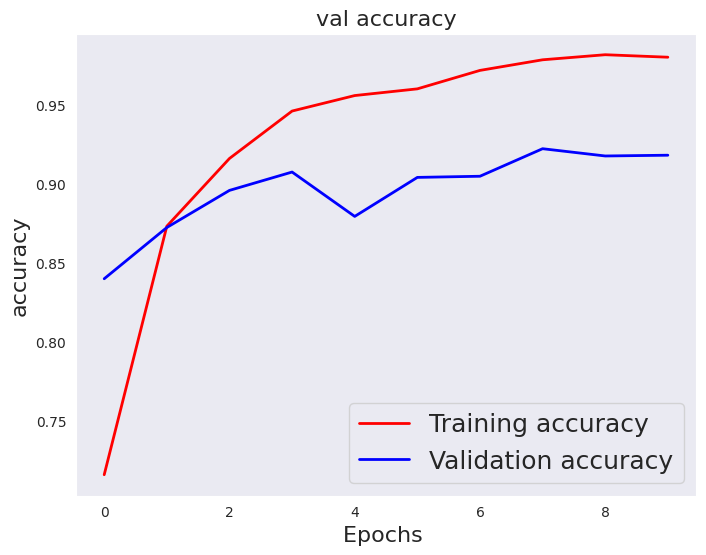

In [23]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [24]:
vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])

129/129 [==============================] - 4s 33ms/step - loss: 0.3142 - accuracy: 0.9181
accuracy of the model is  0.9181201457977295


**For testing the external image**

In [29]:
from google.colab import files
files.upload()

Saving test2.jpg to test2.jpg


{'test2.jpg': b'\xff\xd8\xff\xe1\x02(Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x0e\x00\x02\x00\x00\x01\xa3\x00\x00\x00V\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\xfa\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x02\x02\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x82\x98\x00\x02\x00\x00\x00\x16\x00\x00\x02\n\x00\x00\x00\x00Early blight on a potato plant (Solanum tuberosum). This blight is caused by the fungus Alternaria solani. The spores lie dormant on tubers under the soil during the winter. They then spread rapidly in warm and wet conditions. Symptoms include the appearance of dark blotches on leaves that turn brown and spread into growing black patches of dead tissue, eventually killing the plant. Photographed in Alberta, Canada.\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01Science Photo Library\x00\xff\xed\x05\x14Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x04\xb1\x1c\x02\x05\x00\tB260/0118\x1c\x02\x14\x00\x0

(1, 84, 84, 3)

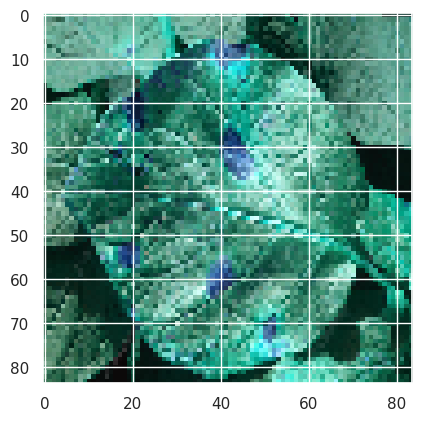

In [30]:
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='test2.jpg'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 [==============================] - 0s 21ms/step
[[7.0111795e-08 2.7746608e-16 1.0606349e-02 3.7902817e-10 1.3226026e-13
  2.3856330e-07 6.5992761e-10 9.3842298e-01 9.0095452e-11 9.8403573e-18
  3.0464460e-19 5.0970376e-02 2.1472600e-08 3.3283852e-13 2.0286638e-10]]
output is  Potato___Early_blight


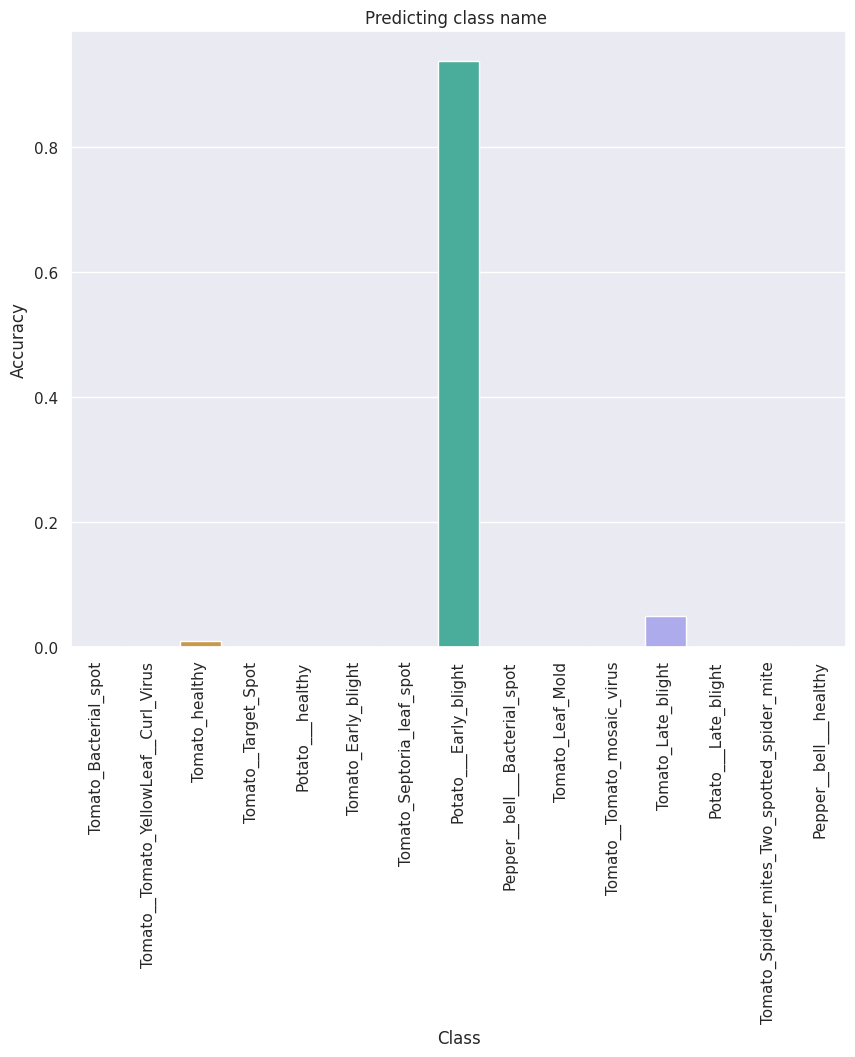

In [31]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()